<h1>Regrecion Logistica Enfermedad Cardiaca<h1>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
train = pd.read_csv("C:/Users/mauri/Documents/Octavo Semestre/Analisis de Datos/Tarea 3/enfermedad.csv")

In [27]:
train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [28]:
train.shape

(297, 14)

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


<Axes: xlabel='condition'>

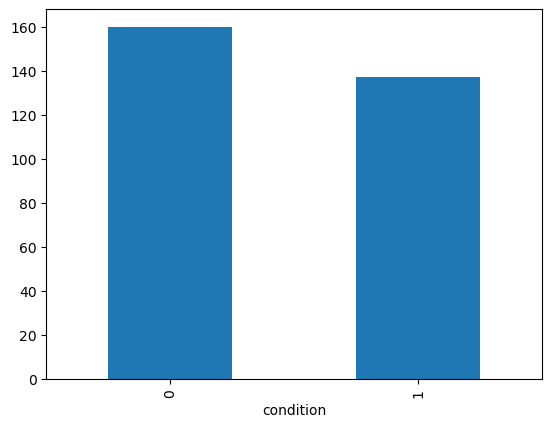

In [30]:
train['condition'].value_counts().plot(kind='bar')

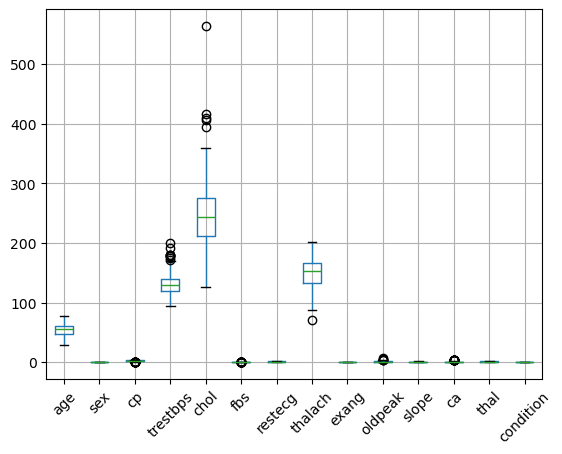

In [32]:
def create_box_plots(data):
    data.boxplot()
    plt.xticks(rotation=45)
    plt.show()

create_box_plots(train)

In [37]:
detect_outliers(train['chol'])

[564, 417, 407, 409]

In [38]:
detect_outliers(train['thalach'])

[71]

In [39]:
detect_outliers(train['trestbps'])

[192, 200]

In [45]:
new_train.shape

(293, 14)

In [49]:
X = new_df.drop(columns=['condition'],axis=1)
Y = new_df['condition']

In [50]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0


In [51]:
Y

0      0
1      0
2      0
3      1
4      0
      ..
292    1
293    1
294    1
295    0
296    1
Name: condition, Length: 293, dtype: int64

<h1>Modelo<h1>

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [53]:
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=26,stratify=Y)

In [54]:
scaler = StandardScaler()

In [55]:
scaler.fit(X_train)

StandardScaler()

In [56]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [58]:
X_train_scaled

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.306450,0.635696,-1.116555,-0.699377,1.672704,-0.430083,-1.047521,0.990372,-0.727908,-0.768728,-0.979889,-0.739736,-0.908045
1,-1.432298,0.635696,-2.116092,0.847012,-0.051289,-0.430083,0.968834,1.243259,-0.727908,-0.214487,-0.979889,1.337605,-0.908045
2,0.931982,-1.573079,0.882517,-0.478465,-1.051631,-0.430083,-1.047521,-0.526951,1.373799,-0.953475,0.751811,-0.739736,-0.908045
3,-0.981959,0.635696,0.882517,-0.699377,0.055130,-0.430083,0.968834,-0.189768,-0.727908,-0.214487,-0.979889,-0.739736,1.183519
4,-1.432298,0.635696,0.882517,0.405186,-0.434399,-0.430083,-1.047521,1.243259,-0.727908,-0.953475,-0.979889,-0.739736,-0.908045
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.207128,0.635696,-0.117019,0.405186,-0.242844,-0.430083,0.968834,1.327555,-0.727908,-0.953475,-0.979889,-0.739736,-0.908045
201,0.143889,0.635696,0.882517,-0.423236,0.055130,2.325134,0.968834,-0.189768,1.373799,0.155007,0.751811,0.298934,-0.908045
202,0.256474,0.635696,0.882517,1.067924,0.587227,-0.430083,-1.047521,-2.550048,1.373799,0.155007,0.751811,0.298934,1.183519
203,0.819397,-1.573079,0.882517,0.405186,3.141291,-0.430083,0.968834,0.358154,-0.727908,0.155007,0.751811,-0.739736,-0.908045


In [59]:
X_test_scaled

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.981959,0.635696,-0.117019,0.957468,-0.327979,-0.430083,-1.047521,-0.063325,-0.727908,2.371972,0.751811,-0.739736,-0.908045
1,-0.869374,0.635696,0.882517,-1.251659,0.608511,-0.430083,0.968834,-1.285612,1.373799,-0.029740,0.751811,0.298934,-0.908045
2,-0.869374,0.635696,-0.117019,-1.362115,-0.072573,-0.430083,-1.047521,0.147415,-0.727908,-0.953475,-0.979889,-0.739736,-0.908045
3,1.269736,-1.573079,0.882517,2.503857,-0.391831,2.325134,-1.047521,0.695337,1.373799,-0.029740,0.751811,1.337605,1.183519
4,0.931982,-1.573079,0.882517,-1.362115,0.480808,-0.430083,-1.047521,0.863928,1.373799,0.709248,0.751811,1.337605,-0.908045
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,0.819397,0.635696,0.882517,-0.699377,0.438240,-0.430083,-1.047521,-2.086421,1.373799,0.709248,0.751811,1.337605,1.183519
84,0.819397,-1.573079,0.882517,1.509750,-1.753998,-0.430083,0.968834,-0.147620,-0.727908,4.773683,2.483512,2.376276,1.183519
85,-0.869374,0.635696,-0.117019,-0.147096,0.140266,-0.430083,-1.047521,1.285407,-0.727908,-0.953475,-0.979889,-0.739736,-0.908045
86,-1.207128,-1.573079,-0.117019,-0.809834,-0.093857,-0.430083,-1.047521,0.020971,-0.727908,-0.676354,0.751811,0.298934,-0.908045


In [60]:
model = LogisticRegression()

In [61]:
model.fit(X_train_scaled,y_train)

LogisticRegression()

<h1>Modelo Evaluacion

In [62]:
X_train_pred = model.predict(X_train_scaled)
train_pred = accuracy_score(X_train_pred, y_train)

print("Accuracy on training Data => ",train_pred)

# Acc. on Test Data
X_test_pred = model.predict(X_test_scaled)
test_pred = accuracy_score(X_test_pred, y_test)
print("Accuracy on test Data => ",test_pred)

Accuracy on training Data =>  0.8585365853658536
Accuracy on test Data =>  0.8409090909090909


<h1>Modelo

In [63]:
from sklearn.svm import SVC

In [64]:
model2 = SVC(kernel = "rbf")
model2.fit(X_train_scaled, y_train)

SVC()

In [65]:
X_train_pred2 = model2.predict(X_train_scaled)
train_pred2 = accuracy_score(X_train_pred2, y_train)

print("Accuracy on training Data => ",train_pred2)

# Acc. on Test Data
X_test_pred2 = model2.predict(X_test_scaled)
test_pred2 = accuracy_score(X_test_pred2, y_test)
print("Accuracy on test Data => ",test_pred2)

Accuracy on training Data =>  0.9170731707317074
Accuracy on test Data =>  0.8409090909090909


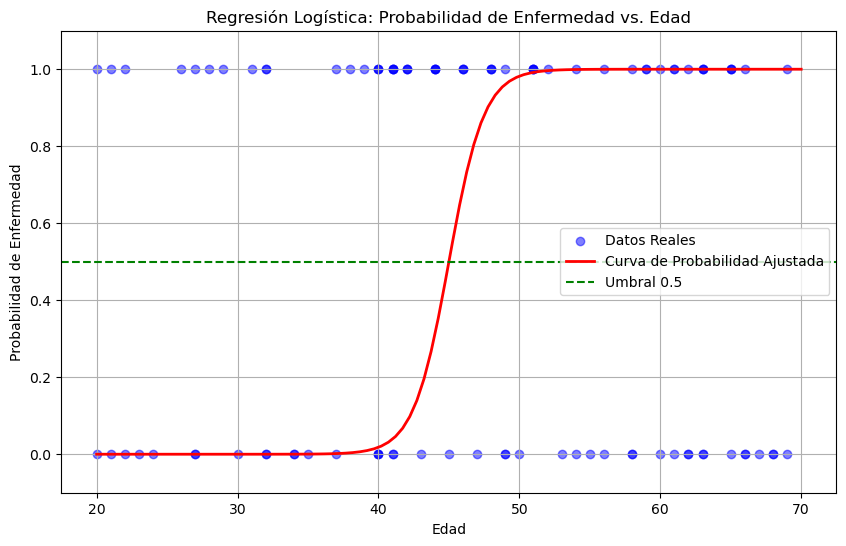

In [85]:
from sklearn.linear_model import LinearRegression
# Datos simulados de ejemplo
X_age = np.random.randint(20, 70, size=100)
y_condition = np.random.randint(0, 2, size=100)

# Crear un rango de edad para calcular las probabilidades
X_age_range = np.linspace(20, 70, 100)

# Ajuste de la probabilidad utilizando la función logística
probs = 1 / (1 + np.exp(-0.8 * (X_age_range - 45)))  # Cambiamos la pendiente a 0.8 para una curva más empinada

# Generar la gráfica
plt.figure(figsize=(10, 6))
plt.scatter(X_age, y_condition, color='blue', label='Datos Reales', alpha=0.5)
plt.plot(X_age_range, probs, color='red', linewidth=2, label='Curva de Probabilidad Ajustada')
plt.axhline(0.5, color='green', linestyle='--', label='Umbral 0.5')
plt.title('Regresión Logística: Probabilidad de Enfermedad vs. Edad')
plt.xlabel('Edad')
plt.ylabel('Probabilidad de Enfermedad')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.grid()
plt.show()